<a href="https://colab.research.google.com/github/Hendyley/Pole_Dancer/blob/main/SC3000_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>**SC3000 Assinment 1 Balancing a Pole on a Cart**<center></h1>

---

<center><img src="https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png" href="https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png"></center>


##### Source: https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png


### Installing dependencies:

> Indented block



###### Reference:
###### Python Gymnasium source: https://gymnasium.farama.org/


In [33]:
!pip install requests
!pip install --upgrade setuptools
!pip install scores
!pip install gymnasium
!pip install Box2D
!pip install tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing dependencies and define helper functions

In [3]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

## Loading CartPole environment

In [41]:
env = gym.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [42]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [94]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [84]:
observation = env.reset()
print("Initial observations:", observation)


print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Initial observations: [ 0.01369603  0.04901366 -0.00632913  0.01422017]
Action Space Discrete(2)
State Space Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [85]:
observation, reward, done, info = env.step(0)
#observation, reward, done, info, terminated, truncated = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)




New observations after choosing action 0: [ 0.0146763  -0.14601696 -0.00604472  0.30489948]
Reward for this step: 1.0
Is this round done? False


In [133]:
env = gym.make("CartPole")
print(env.action_space.n)

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

observation = env.reset()
print("Initial observations:", observation)
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))


Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])
epsilon = 1
epsilon_decay_value = 0.99995

q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))




2
Initial observations: [ 0.02759341 -0.04662059  0.04026144 -0.00983492]
Action Space Discrete(2)
State Space Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [139]:
import time
for episode in range(EPISODES + 1): 
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()) 
    done = False
    episode_reward = 0 

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) 
        else:

            action = np.random.randint(0, env.action_space.n) 

        new_state, reward, done, _ = env.step(action) 
        episode_reward += reward 
        new_discrete_state = get_discrete_state(new_state)

        #if episode % 2000 == 0: 
            #env.render()
           

        if not done: 
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: 
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total

    total_reward += episode_reward 
    prior_reward = episode_reward

    if episode % 1000 == 0: 
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

<ipython-input-133-6f4583daddea>:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode: 0
Time Average: 4.21452522277832e-06
Mean Reward: 0.013
Time Average: 0.0024006683826446533
Mean Reward: 22.188
Episode: 2000
Time Average: 0.0012655818462371825
Mean Reward: 22.959
Time Average: 0.0017132418155670166
Mean Reward: 22.011
Episode: 4000
Time Average: 0.0018308489322662353
Mean Reward: 22.642
Time Average: 0.0018096179962158203
Mean Reward: 22.088
Episode: 6000
Time Average: 0.0010644826889038086
Mean Reward: 22.102
Time Average: 0.0010605437755584718
Mean Reward: 21.727
Episode: 8000
Time Average: 0.001086627721786499
Mean Reward: 22.008
Time Average: 0.0010863234996795655
Mean Reward: 21.584
Episode: 10000
Time Average: 0.0011228923797607423
Mean Reward: 22.558
Epsilon: 0.9512282354250458
Time Average: 0.0011208579540252686
Mean Reward: 22.848
Epsilon: 0.9277417467531685
Episode: 12000
Time Average: 0.0012093124389648438
Mean Reward: 24.454
Epsilon: 0.8824941446941661
Epsilon: 0.8607047486686201
Time Average: 0.001236109733581543
Mean Reward: 25.408
Epsilon: 0.

Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [80]:
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 10.0


## Task 1: Development of an RL agent

An example of a naive agent is given below, which randomly chooses an action regardless of the observation:

In [11]:
def rand_policy_agent(observation):
    return random.randint(0, 1)

In [166]:
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


def Reinforcement_Learning_implementation(state):
  if np.random.rand() < 1.0:
            return random.randrange(env.action_space.n)
  q_values = Sequential.predict(state)
  
  return np.argmax(q_values[0])

In [157]:
action = Reinforcement_Learning_implementation(observation)
print(observation)
print(action)

[-0.07516804 -0.16832691  0.22416742  0.757913  ]
1


For Task 1, we can show the observation and chosen action below:

In [179]:
observation = env.reset()
#action = rand_policy_agent(observation)
action = Reinforcement_Learning_implementation(observation)
print("Observation:", observation)
print("Chosen action:", action)
print("Chosen reward:", reward)

cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Observation: [-0.01811856  0.02672369 -0.01358201  0.0395399 ]
Chosen action: 0
Chosen reward: 0.0
Cumulative reward for this round: 10.0


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

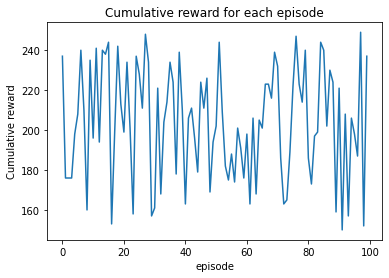

In [13]:
episode_results = np.random.randint(150, 250, size=100)
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

In [79]:
episode_results

array([237, 176, 176, 176, 198, 208, 240, 210, 160, 235, 196, 241, 194,
       240, 238, 244, 153, 199, 242, 213, 199, 234, 201, 158, 237, 228,
       211, 248, 234, 157, 161, 221, 168, 204, 214, 234, 224, 178, 239,
       210, 163, 206, 211, 196, 179, 224, 211, 226, 169, 194, 202, 244,
       209, 182, 175, 188, 174, 201, 191, 176, 198, 163, 206, 168, 205,
       201, 223, 223, 216, 239, 232, 186, 163, 165, 189, 222, 247, 223,
       214, 240, 186, 173, 197, 199, 244, 240, 202, 230, 224, 159, 221,
       150, 208, 157, 206, 198, 187, 249, 152, 237])

In [ ]:
rewards_collection=[]
for x in range(100):
  action = Reinforcement_Learning_implementation(observation)
  cumulative_reward = 0
  done = False
  while not done:
      observation, reward, done, info = env.step(action)
      cumulative_reward += reward
  print("Cumulative reward for this round:", cumulative_reward)
  rewards_collection.append(cumulative_reward)

In [ ]:
rewards_collection

In [142]:
import time
rewards_collection = []
for episode in range(100 + 1): 
    action = Reinforcement_Learning_implementation(observation) # Try with Func
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()) 
    done = False
    episode_reward = 0 
    
    print("Episode: " + str(episode))
    while not done: 

        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state]) 
        else:
            action = np.random.randint(0, env.action_space.n) 
            
        new_state, reward, done, _ = env.step(action) 
        episode_reward += reward 
        new_discrete_state = get_discrete_state(new_state)

        #if episode % 2000 == 0: 
            #env.render()
           
        if not done: 
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q
        discrete_state = new_discrete_state

    if epsilon > 0.05: 
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)
            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total

    total_reward += episode_reward 
    prior_reward = episode_reward
 
    mean = total #/ 1000
    #print("Time Average: " + str(mean))
    total = 0
    mean_reward = total_reward #/ 1000
    print("Mean Reward: " + str(mean_reward))
    total_reward = 0

env.close()

<ipython-input-133-6f4583daddea>:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode: 0
Mean Reward: 337.0
Episode: 1
Mean Reward: 61.0
Episode: 2
Mean Reward: 168.0
Episode: 3
Mean Reward: 149.0
Episode: 4
Mean Reward: 217.0
Episode: 5
Mean Reward: 126.0
Episode: 6
Mean Reward: 218.0
Episode: 7
Mean Reward: 223.0
Episode: 8
Mean Reward: 146.0
Episode: 9
Mean Reward: 156.0
Episode: 10
Mean Reward: 209.0
Episode: 11
Mean Reward: 245.0
Episode: 12
Mean Reward: 150.0
Episode: 13
Mean Reward: 203.0
Episode: 14
Mean Reward: 162.0
Episode: 15
Mean Reward: 139.0
Episode: 16
Mean Reward: 242.0
Episode: 17
Mean Reward: 110.0
Episode: 18
Mean Reward: 173.0
Episode: 19
Mean Reward: 183.0
Episode: 20
Mean Reward: 145.0
Episode: 21
Mean Reward: 221.0
Episode: 22
Mean Reward: 165.0
Episode: 23
Mean Reward: 345.0
Episode: 24
Mean Reward: 166.0
Episode: 25
Mean Reward: 210.0
Episode: 26
Mean Reward: 176.0
Episode: 27
Mean Reward: 382.0
Episode: 28
Mean Reward: 205.0
Episode: 29
Mean Reward: 378.0
Episode: 30
Mean Reward: 188.0
Episode: 31
Mean Reward: 179.0
Episode: 32
Mean Re

Print the average reward over the 100 episodes.

In [143]:
print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)

Average cumulative reward: 203.99
Is my agent good enough? True


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [171]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
while True:
    env.render()
    #your agent goes here
    action = Reinforcement_Learning_implementation(observation) # Try with Func
    observation, reward, done, info = env.step(action) 
    if done: 
      break;    
env.close()
show_video()

## Task 4: Format the Jupyter notebook by including step-by-step instruction and explanation